# Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data loading
import pandas as pd

DATASET_PATH = 'StudentPerformanceFactors.csv'
DATASET_TARGET = 'Exam_Score'

df = pd.read_csv(DATASET_PATH)

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
categorical_vars = []
continuous_vars = []
binary_vars = []
ordinal_vars = []
dtype = []

for col in df.columns:
    unique_count = df[col].nunique()
    cols_type = None
    unique = None

    # Categorical variables
    if df[col].dtype == 'object':
        categorical_vars.append(col)
        unique = df[col].unique().tolist()

        # Binary variables
        if unique_count == 2:
            binary_vars.append(col)
            cols_type = 'Binary'

        # Ordinal and nominal variables
        elif unique_count <= 3 and df[col].dtype == 'object':
            ordinal_vars.append(col)
            cols_type = 'Ordinal'
    # Continous variables
    else:
        continuous_vars.append(col)
        cols_type = 'Continuous'

    dtype.append({
        "Name": col,
        "Type": cols_type,
        "Unique value": unique
    })

df_cols_dtype = pd.DataFrame(dtype)

df_cols_dtype

,Name,Type,Unique value
0,Hours_Studied,Continuous,None
1,Attendance,Continuous,None
2,Parental_Involvement,Ordinal,"[Low, Medium, High]"
3,Access_to_Resources,Ordinal,"[High, Medium, Low]"
4,Extracurricular_Activities,Binary,"[No, Yes]"
5,Sleep_Hours,Continuous,None
6,Previous_Scores,Continuous,None
7,Motivation_Level,Ordinal,"[Low, Medium, High]"
8,Internet_Access,Binary,"[Yes, No]"
9,Tutoring_Sessions,Continuous,None


# Data Preprocessing

## Data cleaning

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [5]:
df.loc[(df[DATASET_TARGET] > 100, DATASET_TARGET)] = 100

## Extract input features and output feature

In [6]:
X = df.drop(columns=[DATASET_TARGET])
y = df[DATASET_TARGET]

display(X)
display(y)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female


0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6378, dtype: int64

## Pipeline for cross validation

Helper class for auto skewness transformation

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import yeojohnson
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class SkewKurtTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, skew_threshold=0.5, kurt_target=3.0,
                 weight_skew=1.0, weight_kurt=0.3):
        """
        columns: list of numeric columns to consider (None = all numeric)
        skew_threshold: below this abs(skew), keep original
        kurt_target: reference kurtosis (3 ~ normal)
        weight_skew, weight_kurt: importance in score
        """
        self.columns = columns
        self.skew_threshold = skew_threshold
        self.kurt_target = kurt_target
        self.weight_skew = weight_skew
        self.weight_kurt = weight_kurt

    def _score(self, series) -> tuple[float, float, float]:
        s = series.dropna()
        if len(s) < 3:
            return np.inf, np.inf, np.inf
        skew = s.skew()
        kurt = s.kurtosis()
        return (self.weight_skew * abs(skew)
                + self.weight_kurt * abs(kurt - self.kurt_target)), skew, kurt

    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()

        # choose columns
        if self.columns is None:
            self.columns_ = X.select_dtypes(include="number").columns.tolist()
        else:
            self.columns_ = list(self.columns)

        self.methods_ = {}
        self.params_ = {}
        self.stats_ = {}

        for col in self.columns_:
            data = X[col].astype(float)

            # original
            best_score, best_skew, best_kurt = self._score(data)
            best_method = "none"
            best_params = {}

            # if already fine on skew, keep original
            if abs(best_skew) < self.skew_threshold:
                self.methods_[col] = best_method
                self.params_[col] = best_params
                self.stats_[col] = {"skew": best_skew, "kurt": best_kurt}
                continue

            # candidate 1: log (with shift if needed)
            d = data.copy()
            shift = 0.0
            if d.min() <= 0:
                shift = abs(d.min()) + 1.0
                d = d + shift
            d_log = np.log(d)
            score, s, k = self._score(d_log)
            if score < best_score:
                best_score, best_skew, best_kurt = score, s, k
                best_method = "log"
                best_params = {"shift": shift}

            # candidate 2: yeo-johnson
            d_nonnull = data.dropna()
            try:
                yj_vals, lam = yeojohnson(d_nonnull)
                d_yj = pd.Series(yj_vals, index=d_nonnull.index).reindex(data.index)
                score, s, k = self._score(d_yj)
                if score < best_score:
                    best_score, best_skew, best_kurt = score, s, k
                    best_method = "yeojohnson"
                    best_params = {"lambda": lam}
            except Exception:
                pass

            # store winner for this column
            self.methods_[col] = best_method
            self.params_[col] = best_params
            self.stats_[col] = {"skew": best_skew, "kurt": best_kurt}

        return self

    def transform(self, X):
        check_is_fitted(self, ["methods_", "params_", "columns_"])
        X = pd.DataFrame(X).copy()

        for col in self.columns_:
            method = self.methods_.get(col, "none")
            if method == "none":
                continue

            data = X[col].astype(float)

            if method == "log":
                shift = self.params_[col].get("shift", 0.0)
                X[col] = np.log(data + shift)

            elif method == "yeojohnson":
                lam = self.params_[col]["lambda"]
                # yeojohnson with fixed lambda
                X[col] = yeojohnson(data, lmbda=lam)

        return X

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import SparsePCA

cont_cols = [c for c in continuous_vars if c != DATASET_TARGET]

continuous_transformer_linear = Pipeline(steps=[
    ("skew_kurt", SkewKurtTransformer(columns=cont_cols,
                                      skew_threshold=0.5,
                                      weight_skew=1.0,
                                      weight_kurt=0.3)),
    ("scaler", StandardScaler())
])

continuous_transformer_non_linear = Pipeline(steps=[
    ("scaler", StandardScaler())
])

onehot_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

ordinal_transformer = Pipeline(steps=[
    ("scaler", OrdinalEncoder())
])

In [9]:
from sklearn import set_config
set_config(transform_output="pandas")

preprocessor_linear = ColumnTransformer(
    transformers=[
        ("cont", continuous_transformer_linear, cont_cols),
        ("onehot", onehot_transformer, binary_vars),
        ("ordinal", ordinal_transformer, ordinal_vars) 
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)


# For tree-based models (RF, XGB) - no scaling, but encoding needed
preprocessor_tree = ColumnTransformer(
    transformers=[
        ("cont", "passthrough", cont_cols),  # No transformation
        ("onehot", onehot_transformer, binary_vars),
        ("ordinal", ordinal_transformer, ordinal_vars) 
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

# For CatBoost - minimal preprocessing
preprocessor_catboost = ColumnTransformer(
    transformers=[
        ("cont", "passthrough", cont_cols),  # No transformation
        ("onehot", "passthrough", binary_vars),
        ("ordinal", "passthrough", ordinal_vars) 
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

In [10]:
sparsePCA = SparsePCA(
        n_components=10,
        alpha=1.0,
        random_state=42,
        max_iter=1000,
        n_jobs=-1,
    )

pipeline_linear = Pipeline(steps=[
    ("preprocessor", preprocessor_linear),
    ("dim_reduction", sparsePCA),
])

pipeline_tree = Pipeline(steps=[
    ("preprocessor", preprocessor_tree),
])

pipeline_catboost = Pipeline(steps=[
    ("preprocessor", preprocessor_catboost),
])

# Model implementation

Models used for choosing best model via performance comparison

In [11]:
from sklearn.base import BaseEstimator, RegressorMixin
from catboost import CatBoostRegressor

class CatBoostRegWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, cat_features=None, **params):
        self.cat_features = cat_features
        self.params = params
        self.model_ = None

    def fit(self, X, y):
        self.model_ = CatBoostRegressor(**self.params)
        self.model_.fit(X, y, cat_features=self.cat_features, verbose=False)
        return self

    def predict(self, X):
        if self.model_ is None:
            raise ValueError("Model has not been fitted yet!")
        return self.model_.predict(X)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

linear_regression = LinearRegression()
lasso = Lasso()
ridge = Ridge()
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()
catboost = CatBoostRegWrapper(cat_features=categorical_vars)

model = {
    "Linear Regression": linear_regression,
    "Lasso": lasso,
    "Ridge": ridge,
    "Random Forest Regressor": random_forest,
    "XGBRegressor": xgboost,
    "Catboosting Regressor": catboost
}

model_pipeline_mapping = {
    "Linear Regression": pipeline_linear,
    "Lasso": pipeline_linear,
    "Ridge": pipeline_linear,
    "Random Forest Regressor": pipeline_tree,
    "XGBRegressor": pipeline_tree,
    "Catboosting Regressor": pipeline_catboost
}

Normal cross-validation (10-Fold)

In [13]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring = {
    "r2": "r2",
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
}

avg_cross_score = []

for name, model in model.items():
    full_pipeline = Pipeline(steps=[
        ("preprocess_transform", model_pipeline_mapping[name]),
        ("model", model)
    ])
    cv_results = cross_validate(
        full_pipeline,
        X,
        y,
        cv=kf,
        scoring=scoring,
        return_train_score=False,
    )
    avg_cross_score.append({
        "Name": name,
        "Average R2 score": cv_results["test_r2"].mean(),
        "Average MAE score": -cv_results["test_mae"].mean(),
        "Average RMSE score": -cv_results["test_rmse"].mean()
    })

cross_val = pd.DataFrame(avg_cross_score)

cross_val

,Name,Average R2 score,Average MAE score,Average RMSE score
0,Linear Regression,0.615107,1.239738,2.422308
1,Lasso,0.406252,1.956892,3.012136
2,Ridge,0.615107,1.239751,2.422307
3,Random Forest Regressor,0.626704,1.181265,2.385095
4,XGBRegressor,0.635274,0.997250,2.359032
5,Catboosting Regressor,0.711904,0.606789,2.091051


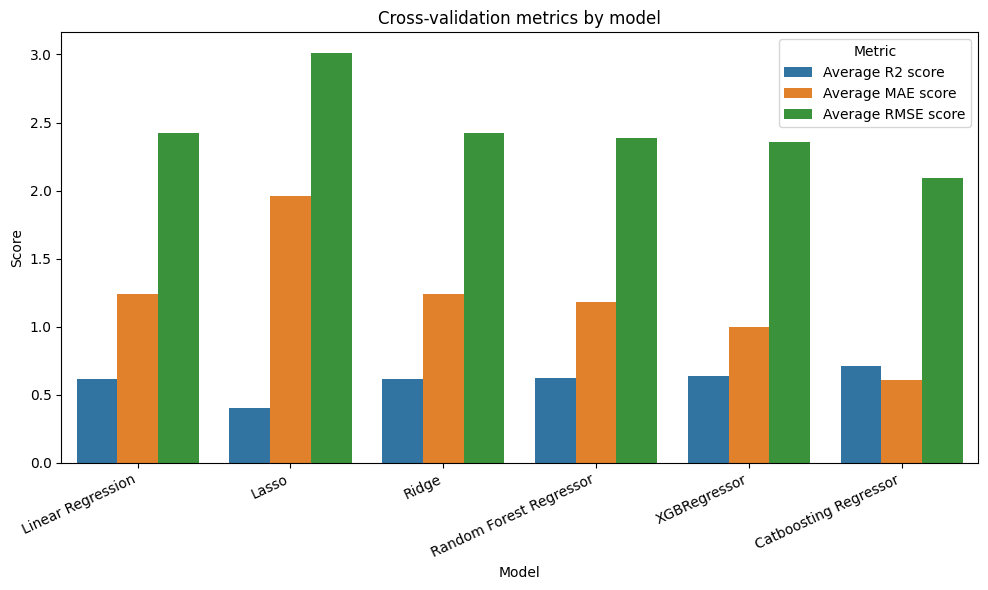

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_to_plot = cross_val.set_index("Name")[[
    "Average R2 score",
    "Average MAE score",
    "Average RMSE score",
]].reset_index()

metrics_long = metrics_to_plot.melt(
    id_vars="Name", value_vars=[
        "Average R2 score",
        "Average MAE score",
        "Average RMSE score",
    ],
    var_name="Metric",
    value_name="Score",
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=metrics_long, x="Name", y="Score", hue="Metric")
ax.set_title("Cross-validation metrics by model")
ax.set_xlabel("Model")
ax.set_ylabel("Score")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()
